## Task-D: Collinear features and their effect on linear models

In [7]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('task_d.csv')

In [9]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [10]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# TASK 1 - Logistic Regression

a) Find the correlation between the features

In [11]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X,Y)

In [14]:
model = SGDClassifier(loss='log')
model.fit(X_sc,Y)

SGDClassifier(loss='log')

In [13]:
coef = model.coef_
for i,w in enumerate(coef[0]):
    print(f" weight {i}: {w}")

 weight 0: 3.0371020053987197
 weight 1: -2.5088767630268753
 weight 2: 5.987294502945964
 weight 3: 2.8943122925505875
 weight 4: -2.5088767630268753
 weight 5: 3.3277669089815243
 weight 6: 4.977612635108219


# adding small error to each datapoint, which is taken from random variable with mean 0 and small variance


In [15]:
X_er = X_sc + np.random.normal(0,0.01,X_sc.shape)

In [16]:
model.fit(X_er,Y)
coef_er = model.coef_
for i,w in enumerate(coef_er[0]):
    print(f" weight {i}: {w}")

 weight 0: 11.021544146623631
 weight 1: -12.896856095805347
 weight 2: 21.094340010412246
 weight 3: 10.775889569431406
 weight 4: -12.894270547653974
 weight 5: 12.199550371267506
 weight 6: 9.785019743182849


# Before and after pertubation, the weights obtained are significantly different and therefore, it can be concluded that the features are collinear and cannot be used for feature importance

b)seaborn heatmap of correlation matrix

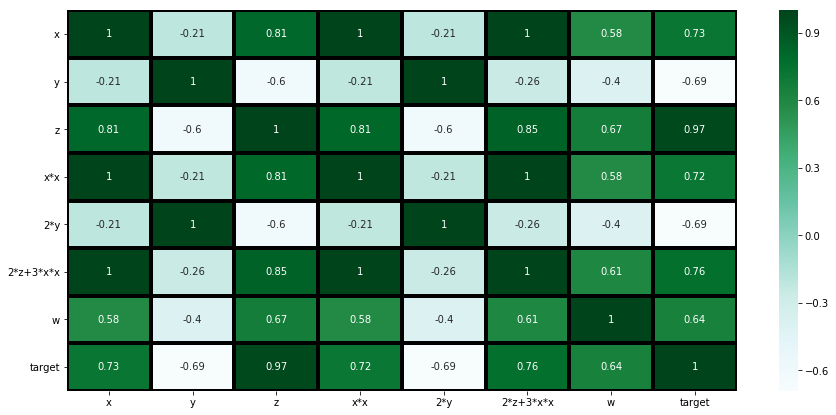

In [39]:
figure = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, cmap='BuGn', linewidths=3, linecolor='black')

# looking at the correlation matrix, following features have strong linear relationship:

x,y 

z, x**

w,z

z, 2*z+*x*x

w,x*x (moderate)

w,2*z+*x*x(moderate)

2.Find best model for given data

a. Train Logistic regression on data(X,Y) that we have created in the above cell
    

In [17]:
clf = SGDClassifier(loss='log')
clf.fit(X,Y)

SGDClassifier(loss='log')

b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    

In [18]:
alpha = np.logspace(0,2)
hyperparameter = [{'alpha': alpha}]
grid_search = GridSearchCV(clf,hyperparameter,cv=5)


c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
    
    

In [19]:
best_model = grid_search.fit(X,Y)

In [20]:
#best hyperparameter value
best_model.best_params_

{'alpha': 1.0}

# The best hyperparameter value was found to be 1.0 through grid search - 5 fold cv

3.Getting the weights with the original data
    

a. train the 'best_model' with X, Y
    

In [21]:
best_model = SGDClassifier(loss='log',alpha=1.0)
best_model.fit(X,Y)

SGDClassifier(alpha=1.0, loss='log')

b. Check the accuracy of the model 'best_model_accuracy'
    

In [24]:
best_model_accuracy = best_model.score(X,Y)
best_model_accuracy

0.99

# After training the model with best hyperparamter value, a very high accuracy (0.99) is obtained

c. Get the weights W using best_model.coef_


In [26]:
W = best_model.coef_

4.Modifying original data
    

a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    

In [27]:
X_err = X + (np.random.randint(0,100) * (10 ** -2))

b. Train the same 'best_model' with data (X', Y)
    

In [28]:
best_model.fit(X_err,Y)

SGDClassifier(alpha=1.0, loss='log')

c. Check the accuracy of the model 'best_model_accuracy_edited'
    

In [31]:
best_model_accuracy_edited = best_model.score(X_err,Y)
best_model_accuracy_edited

0.99

# accuracy of model remains same even after addition of outlier.

d. Get the weights W' using best_model.coef_


In [32]:
W_ = best_model.coef_

5.Checking deviations in metric and weights 
    

a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    

In [33]:
best_model_accuracy_edited - best_model_accuracy

0.0

b. find the absolute change between each value of W and W' ==> |(W-W')|
    

In [34]:
W - W_

array([[0.00427724, 0.01273821, 0.01089136, 0.00373512, 0.01273821,
        0.00431907, 0.01095538]])

c. print the top 4 features which have higher % change in weights 
    compare to the other feature


In [255]:
h = W - W_
h = np.sort(h)
h= h.reshape(-1,1)
h = h[::-1]

In [256]:
h[0:4]

array([[0.03122248],
       [0.03122248],
       [0.02837311],
       [0.02643868]])

# TASK 2

2.Finding the best model for the given data
    

a. Train linear SVM on data(X,Y) that we have created in the above cell
    


In [35]:
clf = SGDClassifier(loss='hinge')
clf.fit(X,Y)

SGDClassifier()

b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    

In [36]:
alpha = np.logspace(0,2)
hyperparameter = [{'alpha': alpha}]
grid_search = GridSearchCV(clf,hyperparameter,cv=5)


c. Creat a new Linear SVM with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    

In [37]:
best_model = grid_search.fit(X,Y)

In [38]:
best_model.best_params_

{'alpha': 1.0}

3.Getting the weights with the original data
    

a. train the 'best_model' with X, Y
    

In [44]:
best_model = SGDClassifier(loss='hinge',alpha=1.0)
best_model.fit(X,Y)

SGDClassifier(alpha=1.0)

b. Check the accuracy of the model 'best_model_accuracy'
    


In [45]:
best_model_accuracy = best_model.score(X,Y)
best_model_accuracy

1.0

# 100% accuracy is obtained with best hyperparameter value - 1.0

c. Get the weights W using best_model.coef_

In [46]:
W = best_model.coef_

4.Modifying original data
    

a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    

In [47]:
X_err = X + (np.random.randint(0,100) * (10 ** -2))

b. Train the same 'best_model' with data (X', Y)
    

In [48]:
best_model.fit(X_err,Y)

SGDClassifier(alpha=1.0)

c. Check the accuracy of the model 'best_model_accuracy_edited'
   

In [51]:
best_model_accuracy_edited - best_model.score(X_err,Y)

0.0

# Accuracy of the model is not impacted by outliers

 d. Get the weights W' using best_model.coef_


In [52]:
W_ = best_model.coef_

5.Checking deviations in metric and weights
    


a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    

In [53]:
best_model_accuracy - best_model_accuracy_edited

0.0

b. find the absolute change between each value of W and W' ==> |(W-W')|
    

In [54]:
W - W_

array([[-0.00237432, -0.00487535, -0.00322463, -0.0040665 , -0.00487535,
        -0.00372149,  0.00720876]])

c. print the top 4 features which have higher % change in weights 
    compare to the other feature


In [55]:
h = W - W_
h = np.sort(h)
h= h.reshape(-1,1)
h = h[::-1]

In [56]:
h[0:4]

array([[ 0.00720876],
       [-0.00237432],
       [-0.00322463],
       [-0.00372149]])

# Here the change in value of weights is in the range of 10^-2